### Data Dictionary
- car: Name or brand of the car.
- price: The price of the car in the local currency.
- body: The type of the car's body (e.g. sedan, hatchback, crossover, etc).
- milage: The distance the car has travelled in kilometers.
- engV: The enine volume of the car in litres.
- engType: The type of engine used in the car (e.g. gasoline, diesel, electric, etc).
- registration: Whether the car has been registered with the local authorities or not.
- year: The year when the car was manufactured.
- model: The model' name or number of car.

In [192]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime

import warnings
warnings.filterwarnings('ignore')

In [193]:
df = pd.read_csv("..\EDA\SoranAutosData.csv")
df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,rear


In [194]:
df.columns

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9572 entries, 0 to 9571
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9572 non-null   object 
 1   price         9572 non-null   float64
 2   body          9572 non-null   object 
 3   mileage       9572 non-null   int64  
 4   engV          9141 non-null   float64
 5   engType       9572 non-null   object 
 6   registration  9572 non-null   object 
 7   year          9572 non-null   int64  
 8   model         9572 non-null   object 
 9   drive         9572 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 747.9+ KB


In [196]:
df.shape

(9572, 10)

In [197]:
null_values = df.isnull().sum()
null_values

car               0
price             0
body              0
mileage           0
engV            431
engType           0
registration      0
year              0
model             0
drive             0
dtype: int64

In [198]:
# Function to format null values to 2dp
def formatt(x):
    return '{:.2f}%'.format(x)

((df.isnull().sum() / len(df)) * 100).apply(formatt)

car             0.00%
price           0.00%
body            0.00%
mileage         0.00%
engV            4.50%
engType         0.00%
registration    0.00%
year            0.00%
model           0.00%
drive           0.00%
dtype: object

In [199]:
# percentage of missing values
round(df.isnull().mean(), 2)

car             0.00
price           0.00
body            0.00
mileage         0.00
engV            0.05
engType         0.00
registration    0.00
year            0.00
model           0.00
drive           0.00
dtype: float64

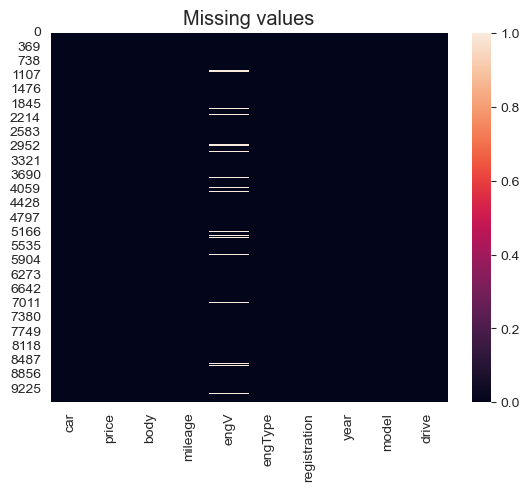

In [200]:
# Visualizing null values
sns.heatmap(df.isnull())
plt.title("Missing values")
plt.show()

In [201]:
df[df.duplicated()]

,car,price,body,mileage,engV,engType,registration,year,model,drive
18,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
42,Mercedes-Benz,20400.0,sedan,190,1.8,Gas,yes,2011,E-Class,rear
70,Mercedes-Benz,0.0,crossover,0,3.0,Diesel,yes,2016,GLE-Class,full
86,Toyota,103999.0,crossover,0,4.5,Diesel,yes,2016,Land Cruiser 200,full
98,Mercedes-Benz,20400.0,sedan,190,1.8,Gas,yes,2011,E-Class,rear
...,...,...,...,...,...,...,...,...,...,...
9153,Volkswagen,15700.0,sedan,110,1.8,Petrol,yes,2011,Passat B7,front
9160,Mercedes-Benz,20500.0,sedan,222,5.5,Petrol,yes,2006,S 500,rear
9161,VAZ,3900.0,hatch,121,1.4,Petrol,yes,2008,1119,front
9166,Hyundai,12900.0,crossover,49,2.7,Petrol,yes,2008,Tucson,full


In [202]:
df.drop_duplicates(inplace=True)

In [203]:
df.shape

(9459, 10)

In [204]:
len(df)

9459

In [205]:
# round(df.isnull().sum()/len(df) * 100, 2)

# round(df.isnull().mean(), 2)

In [206]:
# Function to format null values to 2dp
# def formatt(x):
#     return '{:.2f}'.format(x)

# (df.isnull().sum()/len(df) * 100).apply(formatt)

In [207]:
# Unique values in each column
df.nunique()

car               83
price           1352
body               6
mileage          442
engV             117
engType            4
registration       2
year              56
model            859
drive              4
dtype: int64

### Summary Statistics

In [208]:
# Summary stats of numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,9459.0,15307.769186,23061.289003,0.0,4999.0,9200.0,16500.0,547800.00
mileage,9459.0,139.947775,98.479827,0.0,70.0,129.0,195.0,999.00
engV,9028.0,2.641272,5.963324,0.1,1.6,2.0,2.5,99.99
year,9459.0,2006.527751,7.060440,1953.0,2004.0,2008.0,2012.0,2016.00


**Notes**
- Outliers in the price column.
- The price and milage of the car is 0.
- Missing value in engV column.
- Scale data to handle outliers.

In [209]:
# summary stats of categorical features
df.describe(include=["object", "bool"])

,car,body,engType,registration,model,drive
count,9459,9459,9459,9459,9459,9459
unique,83,6,4,2,859,4
top,Volkswagen,sedan,Petrol,yes,E-Class,front
freq,927,3622,4340,8898,192,5507


### Feature Engineering

- Feature engineering is a machine learning technique that leverages data to create new variables that aren't in the training set.
- The main goal of Feature Engineering is to get the best results from the algorithms. It involves:
    - Create a new column
    - Feature Selection
    - Handling missing values
    - Handling imbalanced data
    - Handling outliers
    - Binning
    - Encoding
    - Feature Scaling

In [210]:
df.head(3)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear


In [211]:
# Creating a new column - car age
df['car_age'] = (datetime.datetime.now().year) - df['year']
df['car_age']

0       14
1       13
2       16
3       12
4       11
        ..
9567    13
9568    38
9569    16
9570    16
9571    17
Name: car_age, Length: 9459, dtype: int64

In [212]:
# datetime.datetime.now().hour

In [213]:
# Rename Column
df.rename(columns={'engV': 'engineVolume'}, inplace=True)
df

,car,price,body,mileage,engineVolume,engType,registration,year,model,drive,car_age
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full,14
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear,13
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear,16
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front,12
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,rear,11
...,...,...,...,...,...,...,...,...,...,...,...
9567,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front,13
9568,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front,38
9569,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full,16
9570,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front,16


### Data Cleaning/Wrangling

In [214]:
df.head(3)

,car,price,body,mileage,engineVolume,engType,registration,year,model,drive,car_age
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full,14
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear,13
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear,16


In [215]:
null_engV = df[df['engineVolume'].isna()]
null_engV

,car,price,body,mileage,engineVolume,engType,registration,year,model,drive,car_age
4,Mercedes-Benz,33000.000,vagon,91,NaN,Other,yes,2013,E-Class,rear,11
13,BMW,4700.000,sedan,200,NaN,Petrol,yes,1996,316,rear,28
30,Nissan,13980.000,hatch,31,NaN,Other,yes,2013,Leaf,front,11
31,Nissan,17300.000,hatch,24,NaN,Other,yes,2013,Leaf,front,11
37,Audi,2850.000,sedan,260,NaN,Other,no,1999,A6,full,25
...,...,...,...,...,...,...,...,...,...,...,...
9466,Chrysler,0.000,vagon,198,NaN,Petrol,yes,2001,PT Cruiser,front,23
9476,Renault,8100.000,van,135,NaN,Diesel,yes,2008,Kangoo ����.,front,16
9511,Renault,5000.000,vagon,150,NaN,Other,yes,2006,Kangoo ����.,front,18
9542,VAZ,907.725,sedan,1,NaN,Other,yes,1986,2106,rear,38


In [216]:
df.dtypes

car              object
price           float64
body             object
mileage           int64
engineVolume    float64
engType          object
registration     object
year              int64
model            object
drive            object
car_age           int64
dtype: object

In [217]:
# df['engineVolume'].median()

In [218]:
# Filling null values
# df.fillna(df['engineVolume'].median())

In [219]:
# Find median for each car model
median_engV = df.groupby('car')['engineVolume'].median().reset_index()
median_engV.columns = ['car', 'median']
median_engV

,car,median
0,Acura,3.5
1,Alfa Romeo,1.8
2,Aro,1.4
3,Aston Martin,6.0
4,Audi,2.5
...,...,...
78,Volvo,2.4
79,Wartburg,1.3
80,ZAZ,1.2
81,ZX,2.4


In [220]:
# Checking engine volume for a particular car model
# median_engV[median_engV['car'] == 'Volvo']

In [221]:
# Function to fill missing volumes with the median value of each engine car
def fill_missing_engV(df):
    if np.isnan(df['engineVolume']):
        return median_engV[median_engV['car'] == df['car']]['median'].values[0]
    
    return df['engineVolume']

df['engineVolume'] = df.apply(fill_missing_engV, axis=1)

In [222]:
df.isnull().sum()

car             0
price           0
body            0
mileage         0
engineVolume    0
engType         0
registration    0
year            0
model           0
drive           0
car_age         0
dtype: int64

### Exploratory Data Analysis
Exploratory Data Analysis refers to the crucial process of performing initial investigations on data to discover patterns.

In [223]:
df.head(3)

,car,price,body,mileage,engineVolume,engType,registration,year,model,drive,car_age
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full,14
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear,13
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear,16


In [224]:
# Categorical data selections with headings
cat_features = df.select_dtypes('object').columns.to_list()
cat_features

['car', 'body', 'engType', 'registration', 'model', 'drive']

In [225]:
# Numerical data selections with headings (nan - numpy; isnull - pandas)
num_features = df.select_dtypes(np.number).columns.to_list()
num_features

['price', 'mileage', 'engineVolume', 'year', 'car_age']

### Univariate Analysis For Numerical Features

In [226]:
# To shade the data using seaborn
sns.set_style('darkgrid')

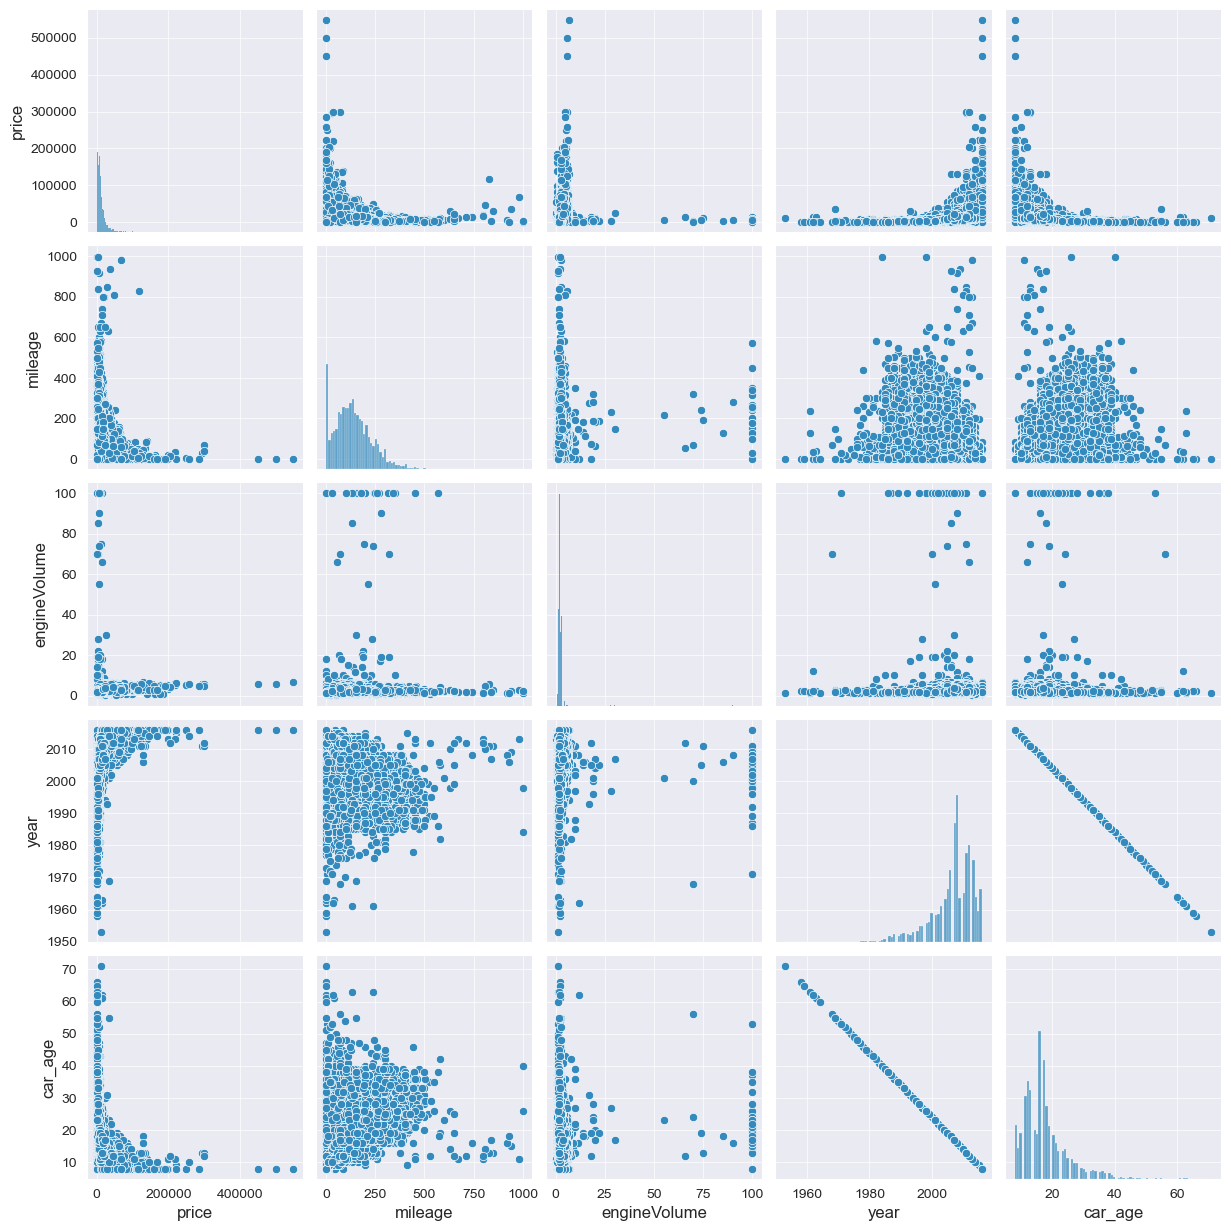

In [227]:
sns.pairplot(df[num_features]);

In [228]:
# To shade the data using matplotlib
# plt.style.use('bmh')

<Figure size 200x200 with 0 Axes>

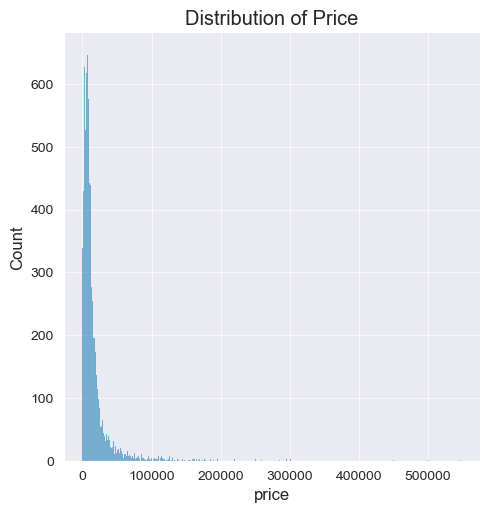

In [229]:
# Distribution of Price
plt.figure(figsize=(2,2))
sns.displot(df['price'])
plt.title('Distribution of Price')
plt.show();

<Figure size 1200x100 with 0 Axes>

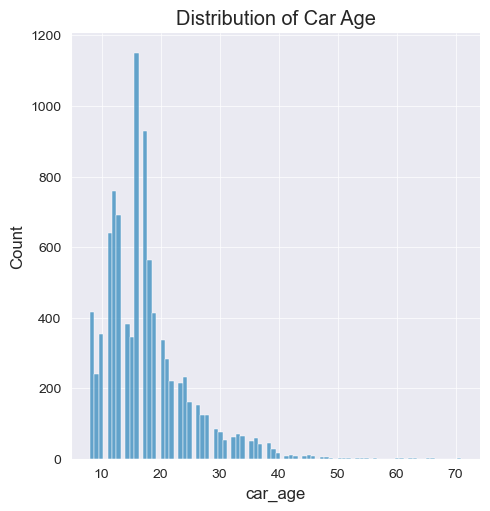

In [230]:
# Distribution of Car Age
plt.figure(figsize=(12,1))
sns.displot(df['car_age'])
plt.title('Distribution of Car Age')
plt.show();

- car_age is Right skewed.

In [231]:
# df['car_age'].value_counts().sort_values(ascending=False)

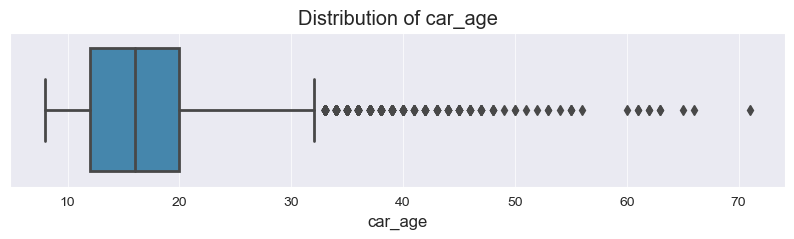

In [232]:
# Distribution of Car Age
plt.figure(figsize=(10,2))
sns.boxplot(x=df['car_age'])
plt.title('Distribution of car_age')
plt.show();

- Presence of an outlier in car_age column.

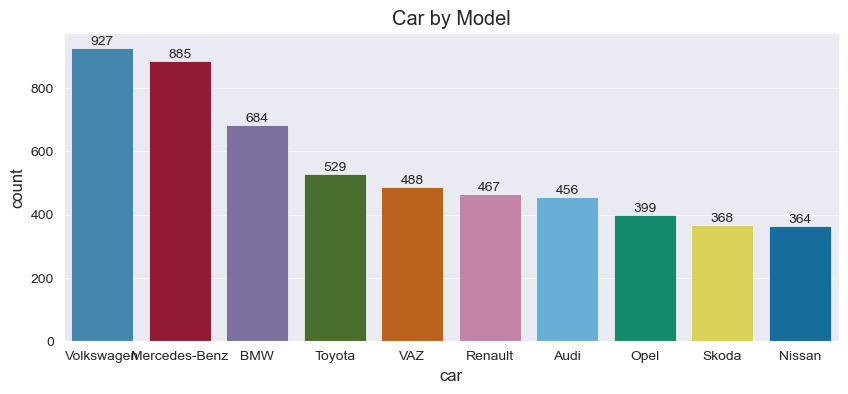

In [233]:
from collections import Counter

# Get the Car Models
plt.figure(figsize=(10,4))
car = sns.countplot(x=df['car'], order=df['car'].value_counts().nlargest(10).index, data=df['car'])
car.bar_label(container=car.containers[0], label=df['car'].value_counts())
plt.title('Car by Model')
plt.show();

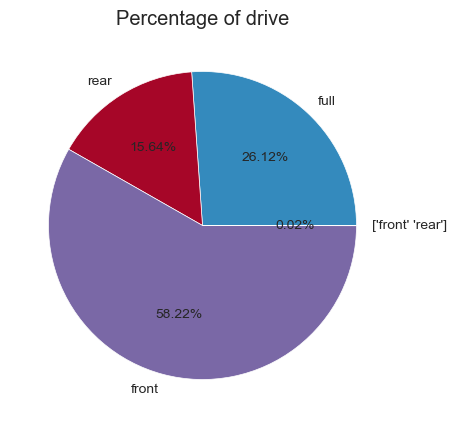

In [234]:
# Percentage of drive
fig, ax = plt.subplots(figsize=(5,5))
count = Counter(df['drive'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f"{p:.2f}%")
ax.set_title("Percentage of drive")
plt.show();

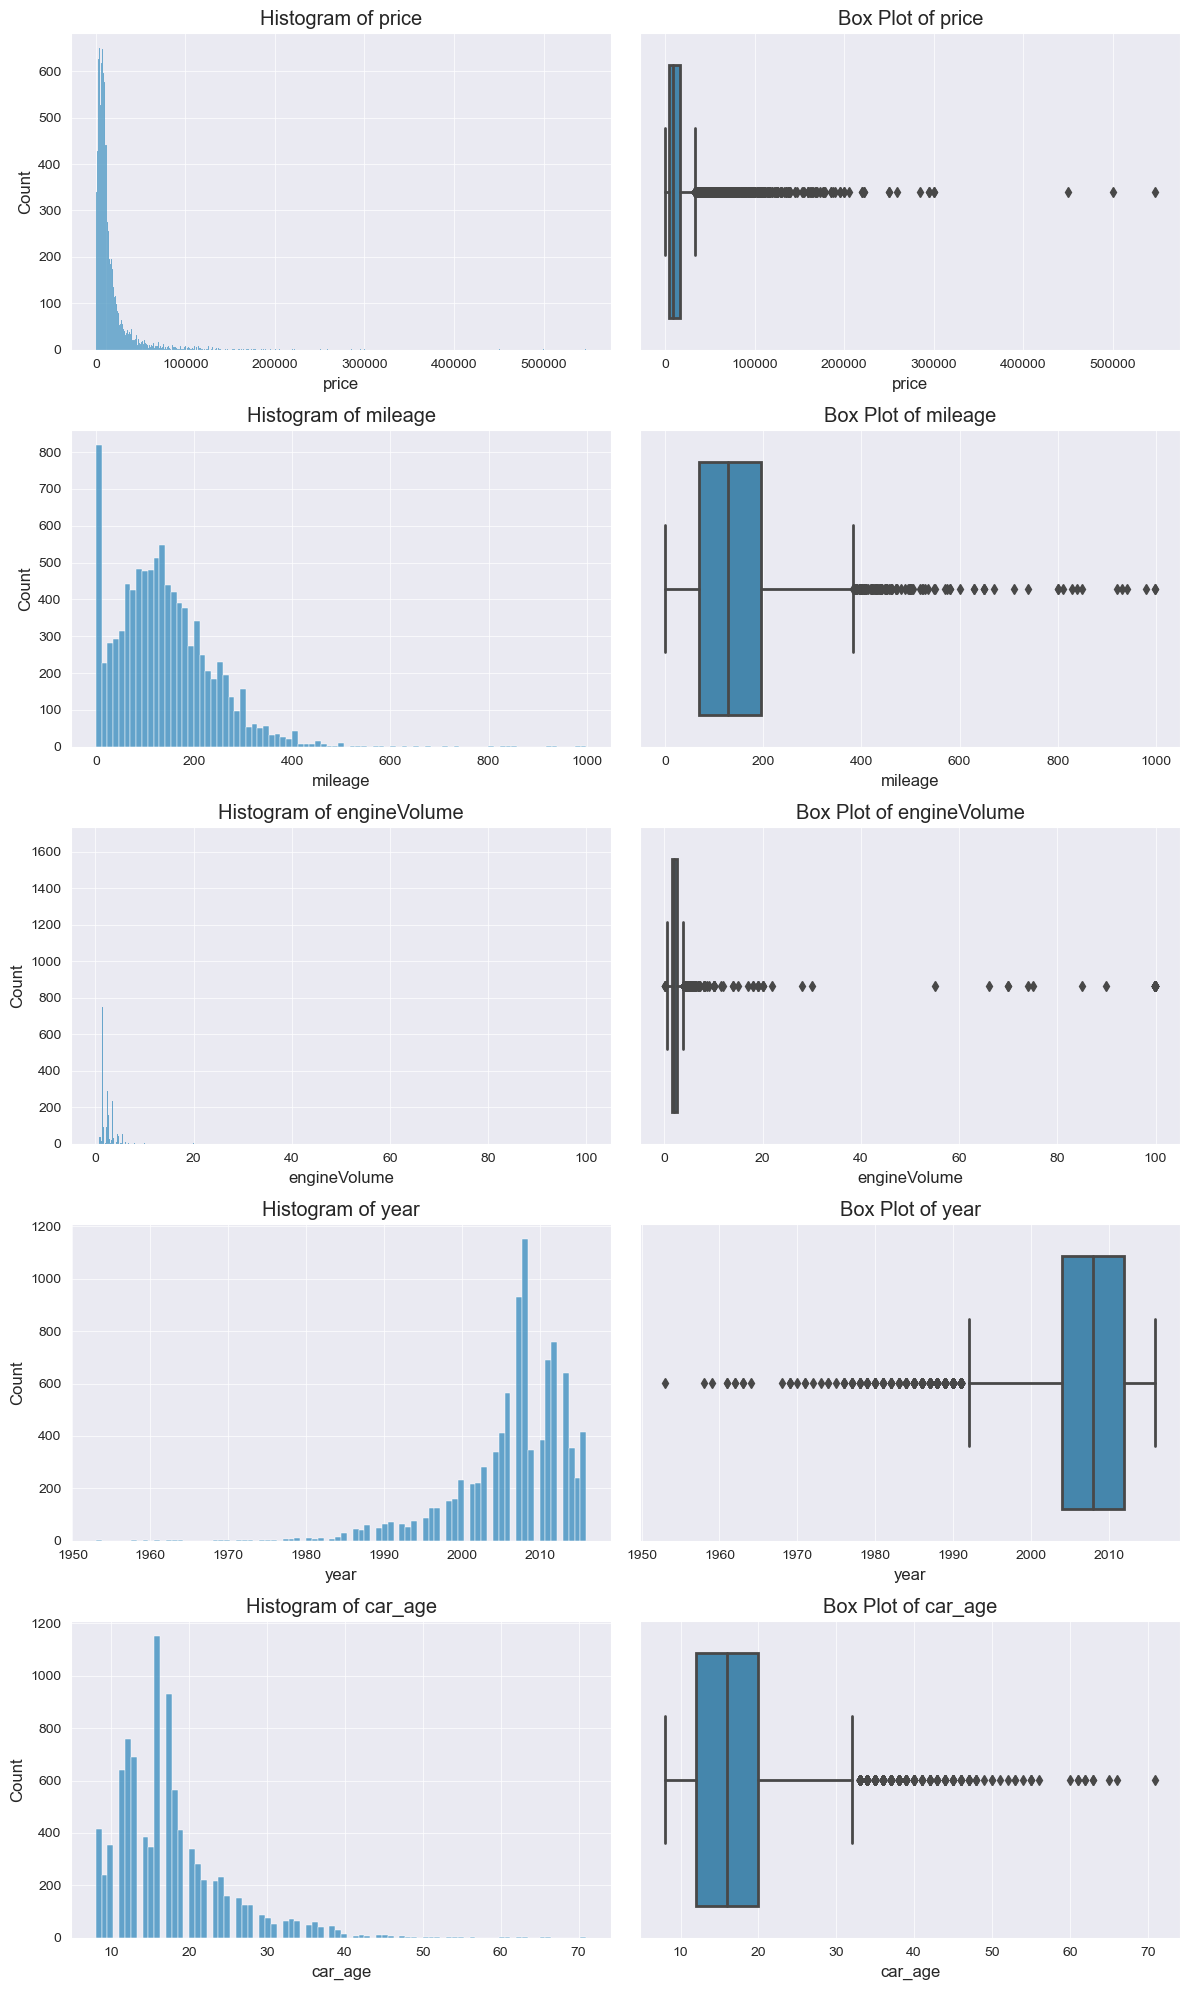

In [235]:
fig, axs = plt.subplots(5,2, figsize=(12, 20))

for index, col in enumerate(num_features):
    # histogram
    sns.histplot(data=df, x=col, ax=axs[index, 0])
    axs[index, 0].set_title(f'Histogram of {col}')
    
    #Boxplot
    sns.boxplot(data=df, x=col, ax=axs[index, 1])
    axs[index, 1].set_title(f'Box Plot of {col}')
    
plt.tight_layout()
plt.show();

### Bivariate Analysis

In [236]:
# df['body'].unique()

<Figure size 1600x200 with 0 Axes>

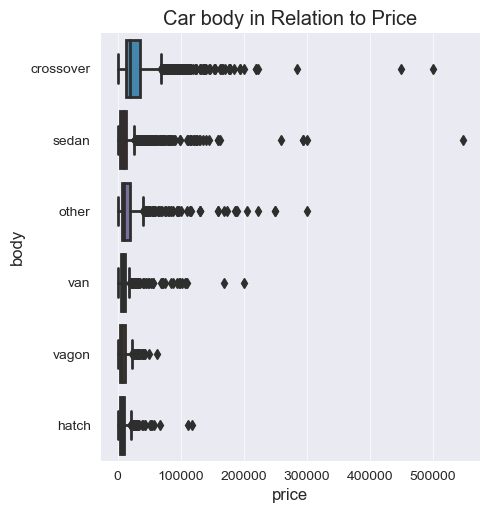

In [237]:
# Body Box Plots - body vs price
plt.figure(figsize=(16, 2))
sns.catplot(y='body', x='price', data=df, kind='box')
plt.title('Car body in Relation to Price')
plt.show();

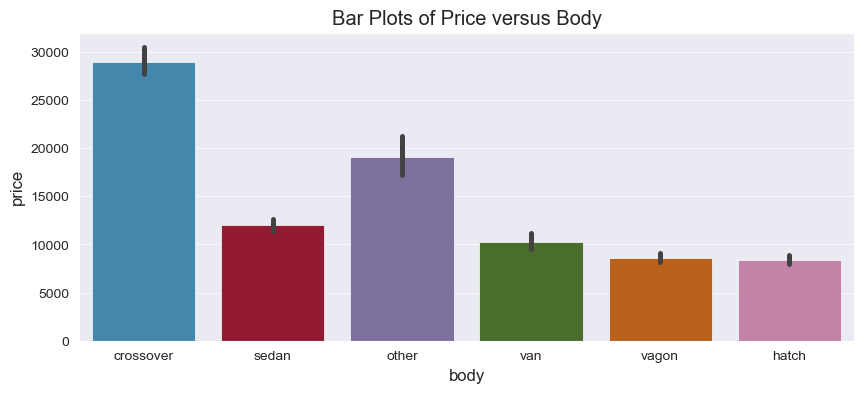

In [238]:
# Body by Price - can always include ci=None to maintain the bars
plt.figure(figsize=(10, 4))
sns.barplot(x='body', y='price', data=df)
plt.title('Bar Plots of Price versus Body')
plt.show();

- Crossover body was sold more than the rest bodies.

### Multivariate Analysis

In [239]:
# df.corr()

In [240]:
# sns.heatmap(df.corr(), annot=True);